In [1]:
import pandas as pd
import math
from keras import models
from keras import layers
from keras import regularizers
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
from google.colab import files 
uploaded = files.upload()

Saving vyborki.xlsx to vyborki.xlsx


In [3]:
df = pd.read_excel('vyborki.xlsx')
df.head()

# fill empty values ​​with the last number
df=df.fillna(222)
df = df.replace(222,np.nan).ffill()

# average for each hour
df.iloc[72:1009, :] = df.iloc[72:1009, :].rolling(13).mean().reindex(df.index[::13])

# average for every two hours
df.iloc[1009:1512, :] = df.iloc[1009:1512, :].rolling(25).mean().reindex(df.index[::25])

df = pd.concat([df[x].dropna().reset_index(drop=True) for x in df], axis=1)

# day
fet = df['d']
dataset = fet.values
met=dataset[:]
data = []
data.append(met[:])
date = np.array(data)

In [4]:
# train data
x_train = np.array(df.iloc[0:72, 0:45]).transpose()
y_train = np.array(df.iloc[67:, 0:45]).transpose()

# test data
x_test= np.array(df.iloc[0:72, 45:60]).transpose()
y_test = np.array(df.iloc[67:, 45:60]).transpose()

In [5]:
np.random.seed(42)
train_data = x_train
train_targets = y_train

In [6]:
# ANN model
def build_model(optimizer='adam'):
  tf.random.set_seed(42)
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(32, activation='relu'))
  model.add(Dropout(0.1))
  model.add(layers.Dense(95, activation='linear'))
  model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
  return model

In [7]:
# model training
model3=build_model(tf.keras.optimizers.Adam(learning_rate=0.0004, beta_1=0.9, beta_2=0.999, amsgrad=False))
history3 = model3.fit(x_train, y_train, epochs=843, validation_data=(x_test, y_test),batch_size=1, verbose=2)

Epoch 1/843
45/45 - 1s - loss: 0.0020 - mae: 0.0285 - val_loss: 0.0014 - val_mae: 0.0220 - 878ms/epoch - 20ms/step
Epoch 2/843
45/45 - 0s - loss: 0.0013 - mae: 0.0194 - val_loss: 8.6299e-04 - val_mae: 0.0174 - 120ms/epoch - 3ms/step
Epoch 3/843
45/45 - 0s - loss: 9.8626e-04 - mae: 0.0168 - val_loss: 6.4980e-04 - val_mae: 0.0159 - 116ms/epoch - 3ms/step
Epoch 4/843
45/45 - 0s - loss: 9.7778e-04 - mae: 0.0158 - val_loss: 5.9472e-04 - val_mae: 0.0153 - 121ms/epoch - 3ms/step
Epoch 5/843
45/45 - 0s - loss: 7.8235e-04 - mae: 0.0152 - val_loss: 5.0307e-04 - val_mae: 0.0148 - 117ms/epoch - 3ms/step
Epoch 6/843
45/45 - 0s - loss: 7.5248e-04 - mae: 0.0149 - val_loss: 4.9848e-04 - val_mae: 0.0144 - 109ms/epoch - 2ms/step
Epoch 7/843
45/45 - 0s - loss: 6.1743e-04 - mae: 0.0144 - val_loss: 4.1860e-04 - val_mae: 0.0136 - 103ms/epoch - 2ms/step
Epoch 8/843
45/45 - 0s - loss: 6.1143e-04 - mae: 0.0137 - val_loss: 3.9079e-04 - val_mae: 0.0134 - 129ms/epoch - 3ms/step
Epoch 9/843
45/45 - 0s - loss: 5.30

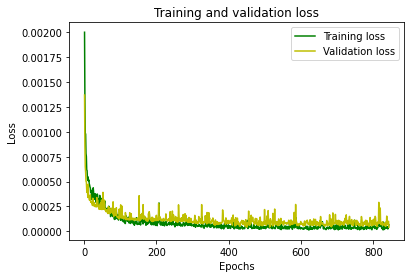

In [45]:
# change mse by epoch
plt.clf()
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

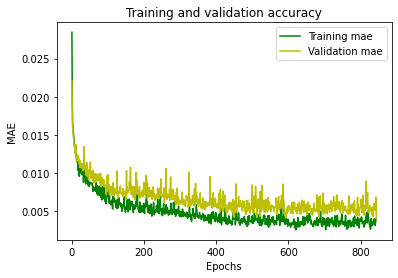

In [46]:
# change mae by epoch
plt.clf()
acc = history3.history['mae']
val_acc = history3.history['val_mae']
plt.plot(epochs, acc, 'g', label='Training mae')
plt.plot(epochs, val_acc, 'y', label='Validation mae')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

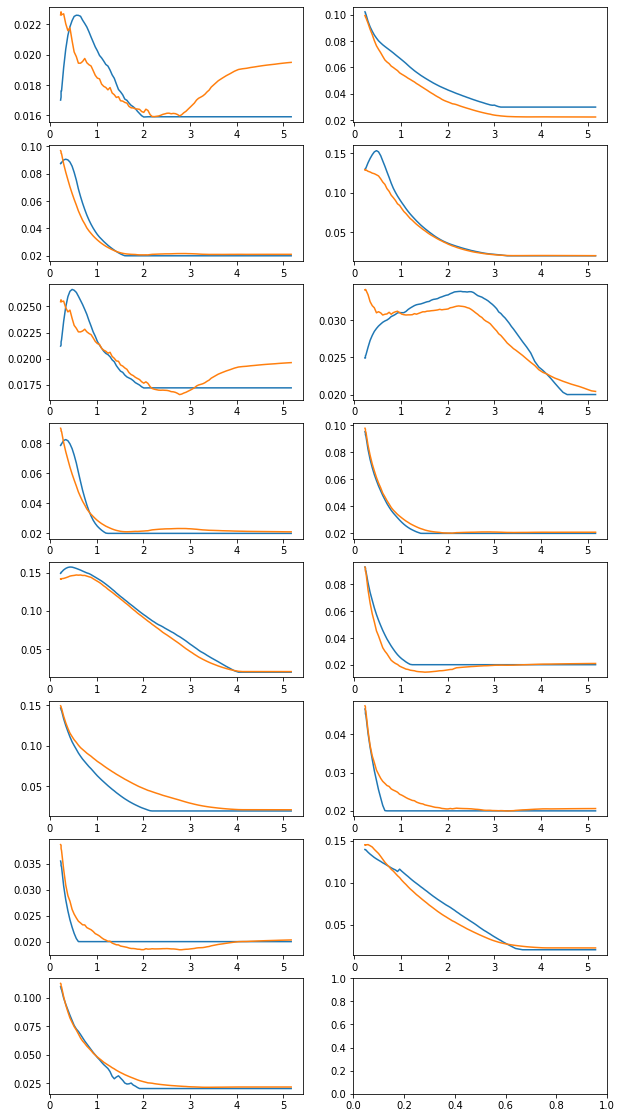

In [47]:
# blue = real voltage, orange - predicted voltage
pred = model3(x_test)
t = pred
t1 = y_test
fig, ax = plt.subplots(8, 2, figsize=(10, 20))
axs = [ax[i, j] for i in range(8) for j in range(2)]
for i in range(0, 15):
    axs[i].plot(date[0, 67:], t1[i])
    axs[i].plot(date[0, 67:], t[i])

In [48]:
# mean absolute error (mae) for test data
mae_er = []
for i in range(0, 15):
  mae_er.append(mean_absolute_error(t1[i], t[i]))

In [49]:
# mean absolute error (mae) for test data
mae_er

[0.0016501831613547253,
 0.007693942673160378,
 0.003385533185929408,
 0.004494831927853003,
 0.0011657327120434388,
 0.002118935316415613,
 0.003644174100870051,
 0.0015276851194686474,
 0.0055014011408270665,
 0.003414811958395484,
 0.012345239104763782,
 0.0014157522233053665,
 0.0013940247706170094,
 0.007645531303274443,
 0.0027554110720066248]

In [50]:
# mean mae
np.mean(mae_er)

0.004010212651352336

In [22]:
# max absolute error (max)
max_er = []
for i in range(0, 15):
  max_er.append(max_error(t1[i], t[i]))

In [23]:
# max absolute error (max)
max_er

[0.0056281210780143726,
 0.01121122692273202,
 0.0198250717410675,
 0.03055725780266974,
 0.004330101561546326,
 0.009208560532331468,
 0.016890839364895424,
 0.003797394683957074,
 0.01250073792017417,
 0.012955942132381257,
 0.02464898454959589,
 0.007109881471899837,
 0.003965619514309439,
 0.014506979187176763,
 0.00871100016282161]

In [24]:
# mean max
np.mean(max_er)

0.012389847908371525

In [25]:
# mean absolute percentage error (mape)
S = 0
mape_er = []
for j in range(0, y_test.shape[0]):
  for i in range(0, y_test.shape[1]):
    S += abs(y_test[j, i]-pred[j, i])/abs(pred[j, i])
  mape_er.append(S/y_test.shape[1])
  S = 0

In [26]:
# mape
mape_er

[<tf.Tensor: shape=(), dtype=float32, numpy=0.08525465>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.2360318>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.085389346>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.056602273>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.055776663>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.07041875>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.108878024>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.05225881>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.082613416>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.15869644>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.2565719>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.057408877>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.06262934>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.13853528>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.092617676>]

In [51]:
# mean mape
np.mean(mape_er)

0.10664555

In [28]:
# simpson's method for integrating amperage
def Q_Simpson(x, f):
  Q=[]
  SUM_Q = 0
  for i in range(2, f.shape[0]):
    SUM_Q+=(x[i]-x[i-2])*(f[i-2]+4*f[i-1]+f[i])/6
    Q.append(SUM_Q)
  return Q

In [29]:
# minutes
fet = df['min']
dataset = fet.values
met=dataset[:]

minut = []
minut.append(met[:])

minut = np.array(minut)

In [30]:
# seconds
second = minut*60

In [31]:
# charge received at predicted voltage
Q_pred = np.array([Q_Simpson(second[0], np.concatenate([x_test[i], t[i][5:]])/100) for i in range(0, 15)])

# charge received at real voltage
Q_real = np.array([Q_Simpson(second[0], np.concatenate([x_test[i], t1[i][5:]])/100) for i in range(0, 15)])

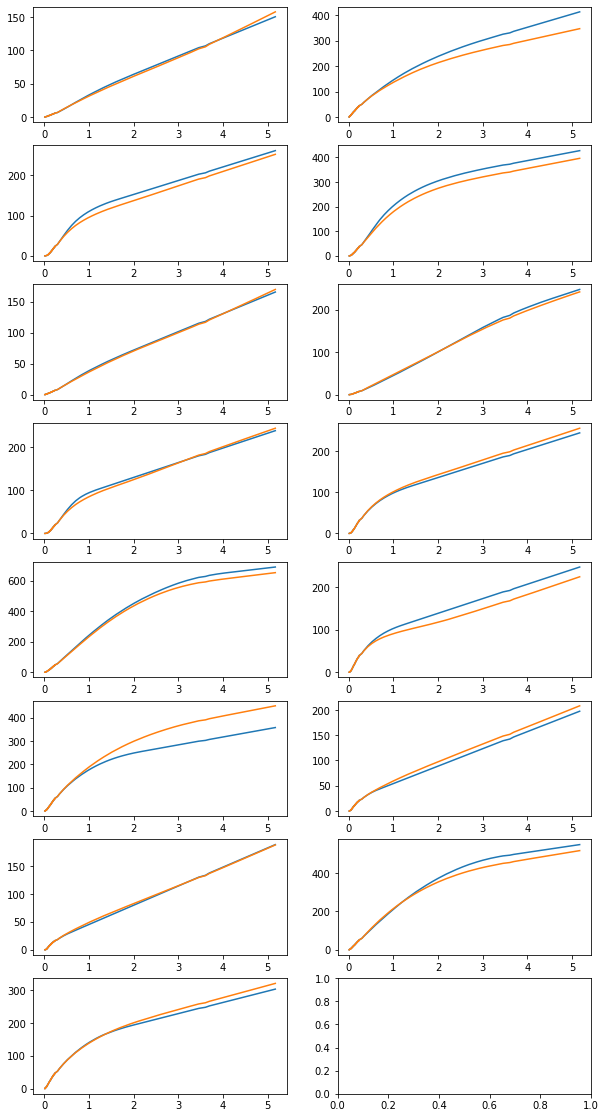

In [32]:
# blue = real charge, orange - predicted charge
fig, ax = plt.subplots(8, 2, figsize=(10, 20))
axs = [ax[i, j] for i in range(8) for j in range(2)]
for i in range(0, 15):
    axs[i].plot(date[0, 2:], Q_real[i])
    axs[i].plot(date[0, 2:], Q_pred[i])

In [33]:
# mean absolute error (mae)
TEST_MAE_ERROR = []
for i in range(0, 15):
  TEST_MAE_ERROR.append(mean_absolute_error(Q_real[i, x_train.shape[1]:], Q_pred[i, x_train.shape[1]:]))

In [34]:
# mae
TEST_MAE_ERROR 

[2.4439200058933364,
 30.197982290563232,
 12.83977580331012,
 27.995506809581983,
 1.5826357601302918,
 3.1420657809471595,
 4.495095668664419,
 6.818007583105365,
 21.446746759808512,
 19.136963556924503,
 55.44965652348619,
 7.772267943673844,
 1.9214728789178175,
 22.316074330100772,
 8.342773603025845]

In [35]:
# mean mae
np.array(TEST_MAE_ERROR).mean()

15.060063019875562

In [36]:
# max absolute error (max)
TEST_MAX_ERROR = []
for i in range(0, 15):
  TEST_MAX_ERROR.append(max_error(Q_real[i, x_train.shape[1]:], Q_pred[i, x_train.shape[1]:]))

In [52]:
# max absolute error (max)
TEST_MAX_ERROR

[7.327967512108671,
 66.1019467002348,
 16.284722557004415,
 32.108968941936666,
 4.191006035590362,
 7.427300988773339,
 9.711818246728626,
 11.326784916824153,
 38.57257630194613,
 24.34194318622309,
 93.28693042074258,
 10.731859960100138,
 4.090679439866506,
 39.27747766683507,
 17.442641269031526]

In [38]:
# mean max
np.array(TEST_MAX_ERROR).mean()

25.481641609596405

In [39]:
# mean absolute percentage error (mape)
S = 0
E = []
for j in range(0, Q_real.shape[0]):
  for i in range(x_train.shape[1], Q_real.shape[1]):
    S += abs(Q_real[j, i]-Q_pred[j, i])/abs(Q_pred[j, i])
  E.append(S/  Q_real.shape[1])
  S = 0

In [40]:
# mean absolute percentage error (mape)
E

[0.02031300822445333,
 0.06575506176469195,
 0.05215348235177499,
 0.05772396156081572,
 0.013369424223250432,
 0.01634252474673258,
 0.02331271273505209,
 0.022824618033882357,
 0.025284776201246955,
 0.07835239565216329,
 0.08764875381308149,
 0.03878124795611707,
 0.016264251434989833,
 0.030722533161234182,
 0.01891020655872641]

In [41]:
# mean mape
np.array(E).mean()

0.03785059722788085

In [42]:
# max mape
S = 0
E = []
D = []
for j in range(0, Q_real.shape[0]):
  for i in range(x_train.shape[1], Q_real.shape[1]):
    D.append(abs(Q_real[j, i]-Q_pred[j, i])/abs(Q_pred[j, i]))

In [43]:
# max mape
np.array(D).max()

0.22613001479574396